In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nps = pd.read_csv("nps.csv")

In [3]:
nps.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [4]:
nps.tail()

,event_date,user_id,score
3321,2020-12-30 21:24:28,289219785,8
3322,2020-12-31 02:01:19,187133285,7
3323,2020-12-31 05:30:00,202035502,10
3324,2020-12-31 06:12:32,196225609,10
3325,2020-12-31 22:09:29,289216565,8


In [5]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_date  3326 non-null   object
 1   user_id     3326 non-null   int64 
 2   score       3326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 78.1+ KB


In [6]:
nps["event_date"] = pd.to_datetime(nps["event_date"])

In [7]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB


1. Detractors
2. Passives
3. Promoters

nps = Promoters% - Detractors%

In [8]:
# # 202001                     # net promotors score = nps to check business health & performance.
# # 202012

# 202000+01
# 202001                        # we will calculate nps on monthly basis. 

In [9]:
year = nps["event_date"].dt.year       
month = nps["event_date"].dt.month     
yearmonth = year*100+month
yearmonth

0       202001
1       202001
2       202001
3       202001
4       202001
         ...  
3321    202012
3322    202012
3323    202012
3324    202012
3325    202012
Name: event_date, Length: 3326, dtype: int64

In [10]:
nps["yearmonth"]  = yearmonth

In [11]:
nps[nps["yearmonth"]==202002]

,event_date,user_id,score,yearmonth
328,2020-02-01 07:04:22,342243623,10,202002
329,2020-02-01 09:31:07,341959012,9,202002
330,2020-02-01 12:58:34,196674217,8,202002
331,2020-02-01 13:11:20,196675082,5,202002
332,2020-02-01 14:08:51,342243610,10,202002
...,...,...,...,...
596,2020-02-27 16:52:27,262862599,10,202002
597,2020-02-28 04:11:40,289215825,8,202002
598,2020-02-28 11:17:16,207004690,8,202002
599,2020-02-28 12:09:03,354261576,7,202002


In [12]:
# D -> 0-6
# Pa -> 7-8
# pr -> 9-10

In [13]:
nps.score.unique()

array([ 8, 10,  0,  6,  7,  9,  5,  2,  4,  3,  1], dtype=int64)

In [14]:
def cat(score):
    if score in range(0,7): # [0,1,2,3,4,5,6]
        return "Detractor"
    elif score in [7,8]:
        return "Passive"
    else:
        return "Promoters"

In [15]:
nps["score"].apply(cat) #applying on score col. 

0         Passive
1       Promoters
2       Promoters
3         Passive
4       Detractor
          ...    
3321      Passive
3322      Passive
3323    Promoters
3324    Promoters
3325      Passive
Name: score, Length: 3326, dtype: object

In [16]:
nps["category"] = nps["score"].apply(cat)

In [17]:
nps[["score", "category"]].head(10)

,score,category
0,8,Passive
1,10,Promoters
2,10,Promoters
3,8,Passive
4,0,Detractor
5,10,Promoters
6,6,Detractor
7,7,Passive
8,7,Passive
9,9,Promoters


In [18]:
nps.head()

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoters
2,2020-01-02 19:11:55,187864388,10,202001,Promoters
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detractor


In [19]:
# 328  

# 100   70  158

In [20]:
# 328-170

In [21]:
# (158-100)/328

# 158/328-100/328

In [22]:
nps.groupby(["yearmonth","category"]).size().loc[(202001,"Passive")]

82

In [23]:
# nps.loc[(row_label1,row_label2),column_label]

In [24]:
nps.groupby(["yearmonth","category"]).size()  # or see below pivot_table

yearmonth  category 
202001     Detractor     31
           Passive       82
           Promoters    215
202002     Detractor     22
           Passive       90
           Promoters    161
202003     Detractor     33
           Passive       72
           Promoters    125
202004     Detractor     36
           Passive       87
           Promoters    178
202005     Detractor     33
           Passive       83
           Promoters    191
202006     Detractor     32
           Passive       80
           Promoters    215
202007     Detractor     48
           Passive       95
           Promoters    258
202008     Detractor     40
           Passive      103
           Promoters    256
202009     Detractor     18
           Passive       68
           Promoters    135
202010     Detractor     36
           Passive       83
           Promoters    177
202011     Detractor     18
           Passive       27
           Promoters     72
202012     Detractor     22
           Passive       42

In [25]:
# yearmonth  Detractor  passive  Pro
# 202001       31         50     120

In [26]:
df_nps = nps.pivot_table(index = "yearmonth", columns = "category", aggfunc = "size") #better

In [27]:
df_nps

category,Detractor,Passive,Promoters
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


In [28]:
df_nps.columns

Index(['Detractor', 'Passive', 'Promoters'], dtype='object', name='category')

In [29]:
df_nps["total"] = df_nps.sum(axis = 1)

In [30]:
df_nps

category,Detractor,Passive,Promoters,total
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


In [31]:
df_nps["nps"] = (df_nps['Promoters'] - df_nps['Detractor'])*100/df_nps['total']

In [32]:
df_nps                 # bar graph is category based. 
                       # line is 

category,Detractor,Passive,Promoters,total,nps
yearmonth,,,,,
202001,31,82,215,328,56.097561
202002,22,90,161,273,50.915751
202003,33,72,125,230,40.000000
202004,36,87,178,301,47.176080
202005,33,83,191,307,51.465798
202006,32,80,215,327,55.963303
202007,48,95,258,401,52.369077
202008,40,103,256,399,54.135338
202009,18,68,135,221,52.941176


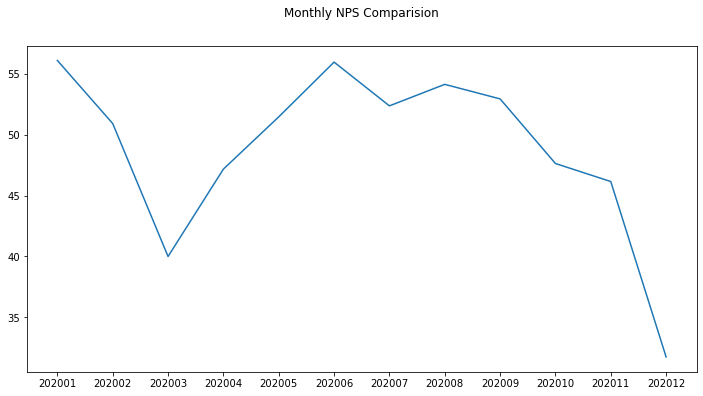

In [33]:
ax = df_nps.reset_index().plot(x ="yearmonth" , y = "nps", kind = "line", 
                          title = "Monthly NPS Comparision", figsize = (12,6), legend = False, xticks =df_nps.index )

plt.title("Monthly NPS Comparision",y = 1.07)
# plt.xticks(df_nps.index,df_nps.index)
plt.xticks(df_nps.index)
ax.set_xticklabels(df_nps.index)
ax.axes.get_xaxis().set_label_text("")# plt.xlabel("")
plt.show()

---------------------------------------------------------------------------------------------------

In [34]:
subs = pd.read_csv("muscle_labs.csv", parse_dates = ["end_date","start_date"])

In [35]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [36]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


we bought gym on 1 January 2013

and now its early December,2014

Churn rate = left/ (left+existing)

In [37]:
15/(15+13)

0.5357142857142857

In [38]:
3/40

0.075

In [39]:
subs["churn_month"] = subs["end_date"].dt.year*100+ subs["end_date"].dt.month

In [40]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [41]:
churn = subs.groupby("churn_month").size()

In [42]:
type(churn)

pandas.core.series.Series

In [43]:
churn

churn_month
201103       8
201104      16
201105      29
201106      27
201107      37
201108      40
201109      39
201110      47
201111      45
201112     100
201201      75
201202      41
201203      43
201204      74
201205      55
201206      38
201207      54
201208      56
201209      63
201210      55
201211      45
201212      50
201301      50
201302      76
201303      70
201304      95
201305      78
201306      85
201307      84
201308      92
201309      87
201310      91
201311      73
201312      90
201401     116
201402      80
201403      67
201404      77
201405     123
201406     130
201407      88
201408     114
201409     152
201410     126
201411     159
201412    1052
201501     840
201502     576
201503     319
201504     579
201505     384
201506     553
201507     280
201508     545
201509     504
201510     650
201511     495
201512     480
dtype: int64

In [44]:
churned = pd.DataFrame(churn, columns = ["Total_churned"])
churned.head()

,Total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


In [45]:
[201101,201102----------------------------------------------------------201411]

[201101, 402513]

In [46]:
years = list(range(2011,2015))
months = list(range(1,13))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [47]:
yearmonths = []

for y in years:
    for m in months:
        yearm = y*100+m
        yearmonths.append(yearm)
    

In [48]:
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [49]:
yearmonths = yearmonths[:-1]

In [50]:
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411]


In [51]:
x = pd.DataFrame({"yearmonths":yearmonths})
x.head()

,yearmonths
0,201101
1,201102
2,201103
3,201104
4,201105


In [52]:
churned.head()

,Total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


In [53]:
df = pd.merge(left = x,right = churned, how = "left" , left_on = "yearmonths", right_index= True) # on = "yearmonths"

In [54]:
df.head()

,yearmonths,Total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yearmonths     47 non-null     int64  
 1   Total_churned  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [56]:
df.fillna(0, inplace = True) # df["Total_churned"].fillna(0)

In [57]:
df.head()

,yearmonths,Total_churned
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [58]:
# churn_rate = Total_churned/(total_churned+existing)

# churn_rate = Total_churned/total_presence

In [59]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [60]:
d = 201101

y = d//100
m = d-y*100
print(y, m)

2011 1


In [61]:
import datetime as dt

date = dt.datetime(y, m, 1)
date

datetime.datetime(2011, 1, 1, 0, 0)

In [62]:
start = subs["start_date"]
end = subs["end_date"]

In [63]:
# 1. start < date

# 2. date <= end

In [64]:
# Start 31  March,2021 10
# date April,2021
# end  18 April,2021 5

In [65]:
def total_members(ym):
    d = ym
    y = d//100
    m = d-y*100
    
    # import datetime as dt
    date = dt.datetime(y, m, 1)
    
    start = subs["start_date"]
    end = subs["end_date"]

    bol = (start < date) & (date <= end)
    return bol.sum()

In [66]:
total_members(201101)


0

In [67]:
df.head()

,yearmonths,Total_churned
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [68]:
df["Total_members"] = df["yearmonths"].apply(total_members)

In [81]:
# df.drop("total_members",axis = 1, inplace = True)

In [70]:
df.head()

,yearmonths,Total_churned,Total_members
0,201101,0.0,0
1,201102,0.0,17
2,201103,8.0,47
3,201104,16.0,82
4,201105,29.0,105


In [71]:
df["Churn_rate"] = df["Total_churned"]/df.Total_members

In [72]:
df.head()

,yearmonths,Total_churned,Total_members,Churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yearmonths     47 non-null     int64  
 1   Total_churned  47 non-null     float64
 2   Total_members  47 non-null     int64  
 3   Churn_rate     46 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.6 KB


In [74]:
df.fillna(0, inplace = True)

In [75]:
df.head()

,yearmonths,Total_churned,Total_members,Churn_rate
0,201101,0.0,0,0.000000
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


In [76]:
df["yearmonths"]= df["yearmonths"].astype(str)

In [77]:
from matplotlib.patches import Ellipse

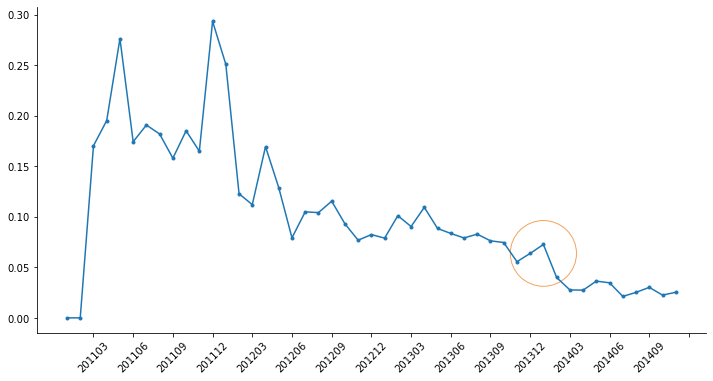

In [78]:
ax = df.plot(x = "yearmonths",y = "Churn_rate" , kind = "line", rot = 45, figsize = (12,6), 
             marker = ".")
start, end = ax.get_xlim()
# ax.get_xticks()
plt.xticks(np.arange(2, end, 3),df["yearmonths"][2::3])
# ax.set_xticklabels(df["yearmonths"][2::3])
y = df.loc[df["yearmonths"]=="201312","Churn_rate"].iloc[0]
x = 36
circle =  Ellipse((x,y),5,0.065, color = "sandybrown", fill = False)
ax.add_artist(circle)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.axes.get_xaxis().set_label_text("")
ax.xaxis.label.set_visible(False)
# plt.legend("")
ax.get_legend().remove()
plt.show()


In [79]:
df.loc[df["yearmonths"]=="201312","Churn_rate"].iloc[0]

0.06373937677053824

In [80]:
df.loc[df["yearmonths"]=="201312","Churn_rate"].loc[35]

0.06373937677053824